<a href="https://colab.research.google.com/github/lf2foce/chat_sqlite/blob/master/iterrows_test_multiple_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install 'PyPortfolioOpt==1.2.3'

Expected annualized return: 0.36461
Standard deviation (Volatility): 0.2654
portfolio sharpe 1.3738
vs  
Expected annualized return ew: 0.5954
Standard deviation (Volatility) ew: 0.29178
portfolio sharpe ew 2.0406
2018-03-30 00:00:00
------------
Expected annualized return: -0.17262
Standard deviation (Volatility): 0.28605
portfolio sharpe -0.6035
vs  
Expected annualized return ew: -0.0446
Standard deviation (Volatility) ew: 0.3143
portfolio sharpe ew -0.1419
2018-06-29 00:00:00
------------
Expected annualized return: 0.00343
Standard deviation (Volatility): 0.25442
portfolio sharpe 0.0135
vs  
Expected annualized return ew: 0.08586
Standard deviation (Volatility) ew: 0.27839
portfolio sharpe ew 0.3084
2018-09-28 00:00:00
------------
Expected annualized return: -0.14422
Standard deviation (Volatility): 0.24198
portfolio sharpe -0.596
vs  
Expected annualized return ew: -0.10136
Standard deviation (Volatility) ew: 0.26162
portfolio sharpe ew -0.3874
2018-12-28 00:00:00
------------
E

<Figure size 1008x504 with 0 Axes>

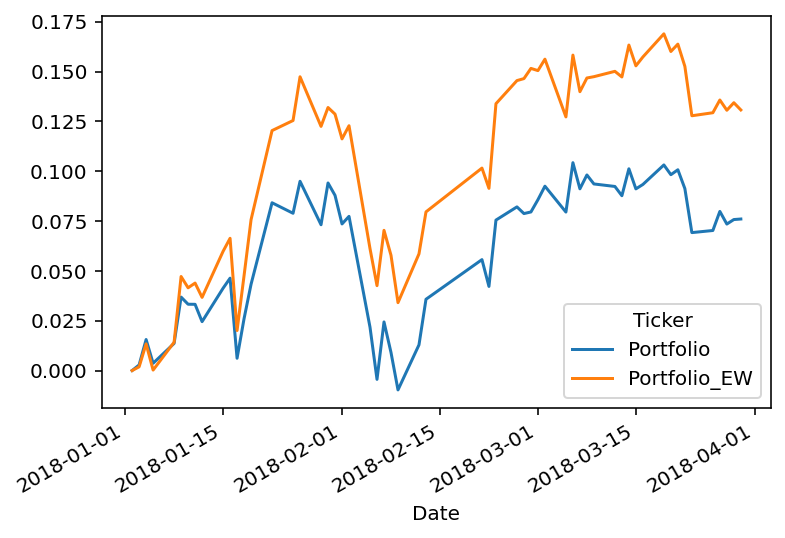

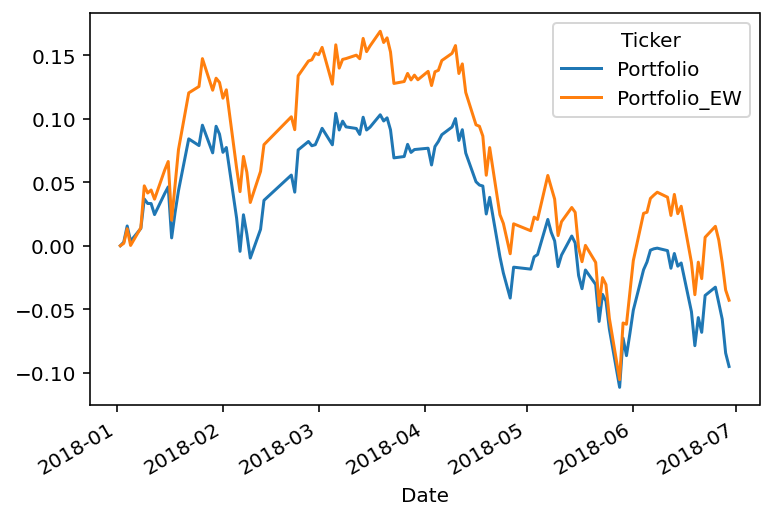

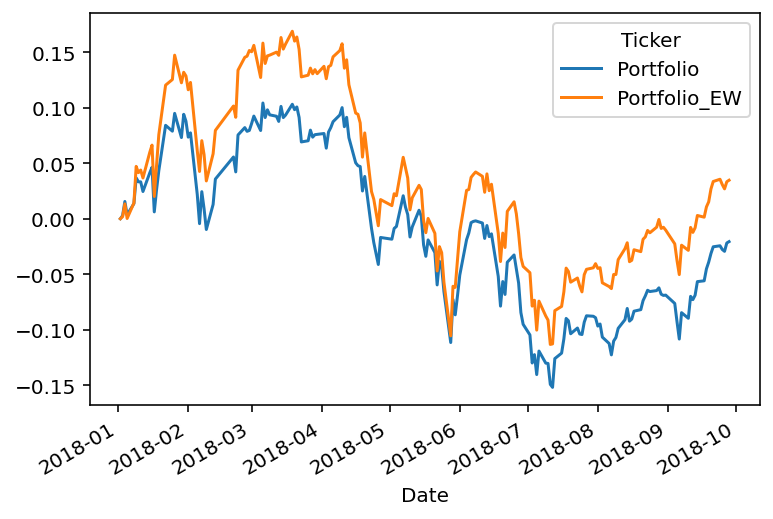

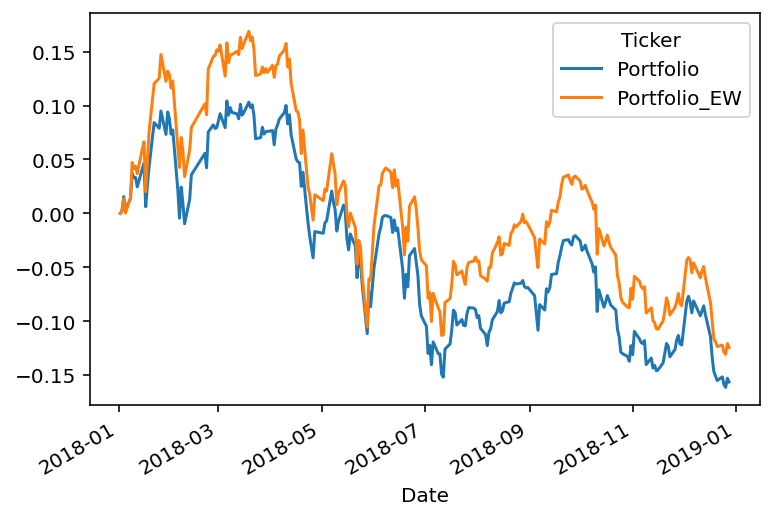

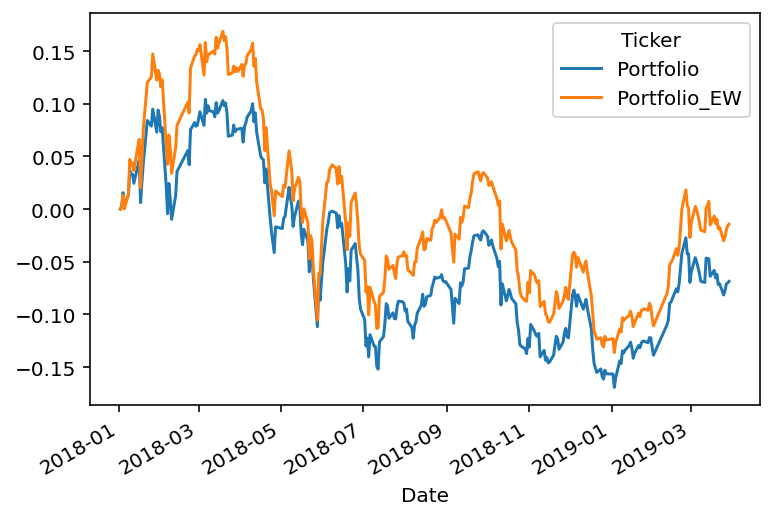

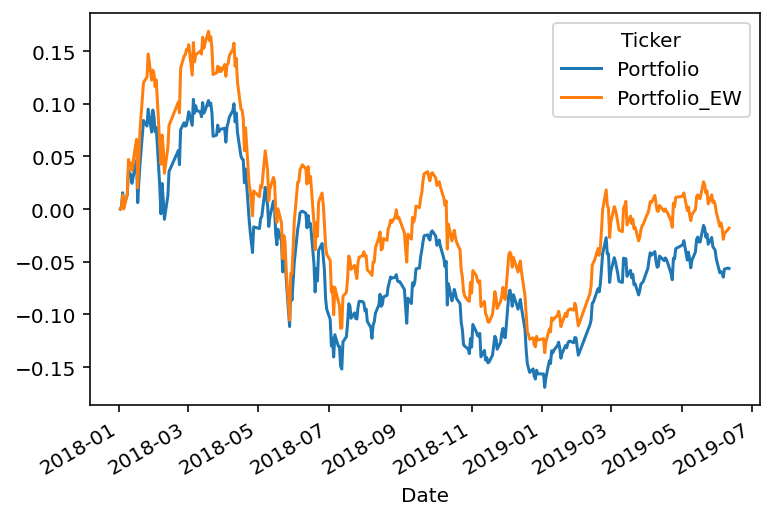

In [138]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

pd.set_option('display.max_columns', None)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(14, 7))
#import csv & table ---------------------------------
data_index = pd.read_csv('/content/drive/My Drive/data_pricevolume06112019.csv')\
      [['Ticker', 'Date', 'High', 'Low', 'Open', 'Close', 'AdjRatio', 'TotalValue', 'Shares', 'Volume']]
fav_stocks = ['VCB', 'HPG', 'FPT', 'VNM'] #, 'MWG'
vn30 = pd.read_csv('/content/drive/My Drive/data_analyst/VN30.csv')
vn30 = vn30['Ticker'].values
selected_ratios = pd.read_excel('/content/drive/My Drive/data_analyst/selected_ratios.xlsx')
sector_L2 = pd.read_csv('/content/drive/My Drive/data_analyst/sectorl2.csv')
#filter & format
data_index['Date'] = pd.to_datetime(data_index['Date'], format='%Y-%m-%d')
data_index = data_index[ (data_index.Ticker.isin(fav_stocks)) &  (data_index['Date'] >= '2018-01-01') ]  #  ((data_index.Ticker.isin(fav_stocks)) & 
#add column
data_index['Year'] = data_index['Date'].apply(lambda x: x.year)
data_index['Adj_Close'] = data_index['Close'] / data_index['AdjRatio']
data_index['day'] = data_index['Date'].dt.day
data_index['quarter'] = data_index['Date'].apply(lambda x: str(x.year) + "Q" + str(x.quarter))

data_index['quarter_end_date'] = data_index.groupby([data_index.Date.dt.year, data_index.Date.dt.quarter])['Date'].tail(1)

quarter_end_date_df = data_index.quarter_end_date.dropna().reset_index(drop=True)
#quarter_end_date_list1 = data_index['quarter_end_date'].dt.date.unique().tolist()
numstocks = len(fav_stocks)
#data_index = data_index.set_index('Date')

for i in quarter_end_date_df:
  df = data_index[data_index['Date'] <= i]
  #df = df[ df.Ticker.isin(fav_stocks) ]   #top10_highest_score_stock    vn30  fav_stocks
  #df = data_index[data_index['Date'] <= i]
  #print(data_index[data_index['Date'] <= i])

  df_pivot = df.pivot(columns='Ticker', index='Date', values='Adj_Close')
  #print(df_pivot)
  returns = df_pivot.pct_change()
  exp_return_d = returns.mean()
  cov_matrix_a = returns.cov() *252   #cov year

  ##portfolio_weights_mcap = data_index[data_index.Date == '2019-01-03'].mcap_weight.to_numpy() #co the sai thu tu
  portfolio_weights_ew = np.repeat(1/numstocks, numstocks)   # Benchmark 1/n strategy
  portfolio_weights = np.array([0.4, 0.2, 0.1, 0.3])
  #statistics weight cho truoc
  portfolio_return_a = round(np.sum(exp_return_d * portfolio_weights) * 252,5)
  portfolio_std_dev = round(np.sqrt(np.dot(portfolio_weights.T,np.dot(cov_matrix_a, portfolio_weights))) ,5)
  #statistics equal weight 
  portfolio_return_ew = round(np.sum(exp_return_d * portfolio_weights_ew) * 252,5)
  portfolio_std_dev_ew = round(np.sqrt(np.dot(portfolio_weights_ew.T,np.dot(cov_matrix_a, portfolio_weights_ew))) ,5)
  
  returns['Portfolio'] = returns.mul(portfolio_weights, axis=1).sum(axis=1)
  returns['Portfolio_EW'] =  returns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
  #returns['Portfolio_MCap'] = returns.iloc[:, 0:numstocks].mul(portfolio_weights_mcap, axis=1).sum(axis=1)
  CummulativeReturns = (1+ returns).cumprod() - 1
  CummulativeReturns[["Portfolio","Portfolio_EW"]].plot()  #, 'Portfolio_MCap'

  print("Expected annualized return: " + str(portfolio_return_a))
  print("Standard deviation (Volatility): " + str(portfolio_std_dev))
  print("portfolio sharpe " + str(np.round(portfolio_return_a/portfolio_std_dev, 4) ))
  print("vs  ")
  print("Expected annualized return ew: " + str(portfolio_return_ew))
  print("Standard deviation (Volatility) ew: " + str(portfolio_std_dev_ew))
  print("portfolio sharpe ew " + str(np.round(portfolio_return_ew/portfolio_std_dev_ew, 4) ))
  
  print(i)
  print("------------")
  



In [0]:
import datetime as dt
start_date = '2015-01-01'
#start_date = pd.to_datetime('01-01-2016')
print(start_date)

#for i in pd.date_range(start_date, periods=30)
#  print(i)
#print(data_index['Date'])
print(dt.datetime.now().date())
#index = pd.date_range('10/1/1999', periods=1100)
#print(index)  
quarter_end = pd.date_range(start_date, dt.datetime.now().date(), freq='Q') #2days were skipped on weeken
print(len(days))
print(days)
print("-------------------------")

2015-01-01
2020-06-12
21
DatetimeIndex(['2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')
-------------------------


In [0]:
class TickData(object):
	""" Stores a single unit of data """

	def __init__(self, timestamp='', symbol='',
				open_price=0, close_price=0, total_volume=0):
		self.symbol = symbol
		self.timestamp = timestamp
		self.open_price = open_price
		self.close_price = close_price
		self.total_volume = total_volume

In [0]:
class MarketData(object):
	def __init__(self):
		self.recent_ticks = dict()  # indexed by symbol

	def add_tick_data(self, tick_data):
		self.recent_ticks[tick_data.symbol] = tick_data

	def get_open_price(self, symbol):
		return self.get_tick_data(symbol).open_price

	def get_close_price(self, symbol):
		return self.get_tick_data(symbol).close_price

	def get_tick_data(self, symbol):
		return self.recent_ticks.get(symbol, TickData())

	def get_timestamp(self, symbol):
		return self.recent_ticks[symbol].timestamp

In [0]:
#test từng function
pd.set_option('display.max_columns', None)
#symbol = 'WIKI/AAPL'
symbol = ['VCB']
start='2017-01-01'
end='2017-12-31'

def fetch_historical_prices(symbol, start_date, end_date):
    #df = data_index[(data_index['Ticker'].isin(symbol)) & (data_index['Date'] > start_date) & (data_index['Date'] < end_date) ]
    df = data_index[(data_index['Ticker'].isin(symbol))] 
    #df = data_index[(data_index['Ticker'] == self.symbol] 
    df = df.loc[start_date: end_date]
    return df
print(fetch_historical_prices(symbol, start, end))

#ben duoi chuan het, test thử 

           Ticker     High      Low     Open    Close  AdjRatio    TotalValue  \
Date                                                                            
2017-01-03    VCB  37500.0  35600.0  35600.0  37250.0  1.044050  7.447100e+10   
2017-01-04    VCB  37600.0  36800.0  37500.0  37000.0  1.044050  4.973400e+10   
2017-01-05    VCB  37300.0  36850.0  36900.0  37150.0  1.044050  3.173600e+10   
2017-01-06    VCB  38400.0  37100.0  37200.0  37900.0  1.044050  9.469700e+10   
2017-01-09    VCB  38950.0  38100.0  38200.0  38700.0  1.044050  9.198900e+10   
...           ...      ...      ...      ...      ...       ...           ...   
2017-12-25    VCB  51700.0  50800.0  51000.0  51400.0  1.021895  7.638100e+10   
2017-12-26    VCB  51700.0  50500.0  51500.0  51400.0  1.021895  8.703400e+10   
2017-12-27    VCB  52800.0  51100.0  51400.0  52500.0  1.021895  1.152380e+11   
2017-12-28    VCB  54900.0  52500.0  52500.0  54100.0  1.021895  1.248140e+11   
2017-12-29    VCB  55000.0  

In [0]:
#symbol = ['VCB']
#start='2017-01-01'
#end='2017-12-31'

class MarketDataSource(object):
    def __init__(self, symbol, tick_event_handler=None, start='', end=''):
        self.market_data = MarketData()

        self.symbol = symbol
        self.tick_event_handler = tick_event_handler
        self.start, self.end = start, end
        self.df = None

    def fetch_historical_prices(self):
        #df = data_index[(data_index['Ticker'].isin(self.symbol))] 
        df = data_index[ data_index['Ticker'] == self.symbol ]
        df = df.loc[self.start: self.end]
        return df


    def run(self):
        if self.df is None:
            self.df = self.fetch_historical_prices()

        total_ticks = len(self.df)
        print('Processing total_ticks:', total_ticks)

        for timestamp, row in self.df.iterrows():
            open_price = row['Open']
            close_price = row['Close']
            volume = row['Volume']

            print(timestamp.date(), 'TICK', self.symbol,
                  'open:', open_price,
                  'close:', close_price)
            tick_data = TickData(timestamp, self.symbol, open_price,
                                close_price, volume)
            self.market_data.add_tick_data(tick_data)

            if self.tick_event_handler:
                self.tick_event_handler(self.market_data)
#audi = MarketDataSource(symbol, start='2016-01-01', end='2017-12-31')
#audi.fetch_historical_prices()

In [0]:
class Order(object):
	def __init__(self, timestamp, symbol, 
		qty, is_buy, is_market_order, 
		price=0
	):
		self.timestamp = timestamp
		self.symbol = symbol
		self.qty = qty
		self.price = price
		self.is_buy = is_buy
		self.is_market_order = is_market_order
		self.is_filled = False
		self.filled_price = 0
		self.filled_time = None
		self.filled_qty = 0

In [0]:
class Position(object):
	def __init__(self, symbol=''):
		self.symbol = symbol
		self.buys = self.sells = self.net = 0
		self.rpnl = 0 #recently realized profits and losses
		self.position_value = 0  #securities is credit into this acct

	def on_position_event(self, is_buy, qty, price):
		if is_buy:
			self.buys += qty
		else:
			self.sells += qty

		self.net = self.buys - self.sells
		changed_value = qty * price * (-1 if is_buy else 1)
		self.position_value += changed_value

		if self.net == 0:
			self.rpnl = self.position_value
			self.position_value = 0

	def calculate_unrealized_pnl(self, price):
		if self.net == 0:
			return 0

		market_value = self.net * price
		upnl = self.position_value + market_value
		return upnl

In [0]:
from abc import abstractmethod

class Strategy:
	def __init__(self, send_order_event_handler):
		self.send_order_event_handler = send_order_event_handler

	@abstractmethod
	def on_tick_event(self, market_data):
		raise NotImplementedError('Method is required!')

	@abstractmethod
	def on_position_event(self, positions):
		raise NotImplementedError('Method is required!')

	def send_market_order(self, symbol, qty, is_buy, timestamp):
		if self.send_order_event_handler:
			order = Order(
				timestamp,
				symbol,
				qty,
				is_buy,
				is_market_order=True,
				price=0,
			)
			self.send_order_event_handler(order)

In [0]:
import pandas as pd

class MeanRevertingStrategy(Strategy):
    def __init__(self, symbol, trade_qty,
        send_order_event_handler=None, lookback_intervals=20,
        buy_threshold=-1.5, sell_threshold=1.5
    ):
        super(MeanRevertingStrategy, self).__init__(
            send_order_event_handler)

        self.symbol = symbol
        self.trade_qty = trade_qty
        self.lookback_intervals = lookback_intervals
        self.buy_threshold = buy_threshold
        self.sell_threshold = sell_threshold

        self.prices = pd.DataFrame()
        self.is_long = self.is_short = False

    def on_position_event(self, positions):
        position = positions.get(self.symbol)

        self.is_long = position and position.net > 0
        self.is_short = position and position.net < 0

    def on_tick_event(self, market_data):
        self.store_prices(market_data)

        if len(self.prices) < self.lookback_intervals:
            return

        self.generate_signals_and_send_order(market_data)

    def store_prices(self, market_data):
        timestamp = market_data.get_timestamp(self.symbol)
        close_price = market_data.get_close_price(self.symbol)
        self.prices.loc[timestamp, 'close'] = close_price

    def generate_signals_and_send_order(self, market_data):
        signal_value = self.calculate_z_score()
        timestamp = market_data.get_timestamp(self.symbol)

        if self.buy_threshold > signal_value and not self.is_long:
            print(timestamp.date(), 'BUY signal')
            self.send_market_order(
                self.symbol, self.trade_qty, True, timestamp)
        elif self.sell_threshold < signal_value and not self.is_short:
            print(timestamp.date(), 'SELL signal')
            self.send_market_order(
                self.symbol, self.trade_qty, False, timestamp)

    def calculate_z_score(self):
        self.prices = self.prices[-self.lookback_intervals:]
        returns = self.prices['close'].pct_change().dropna()
        z_score = ((returns - returns.mean()) / returns.std())[-1]
        return z_score

In [0]:
class BacktestEngine:
	def __init__(self, symbol, trade_qty, start='', end=''):
		self.symbol = symbol
		self.trade_qty = trade_qty
		self.market_data_source = MarketDataSource(
			symbol,
			tick_event_handler=self.on_tick_event,
			start=start, end=end
		)

		self.strategy = None
		self.unfilled_orders = []
		self.positions = dict()
		self.df_rpnl = None
        
	def start(self, **kwargs):
		print('Backtest started...')

		self.unfilled_orders = []
		self.positions = dict()
		self.df_rpnl = pd.DataFrame()

		self.strategy = MeanRevertingStrategy(
			self.symbol,
			self.trade_qty,
			send_order_event_handler=self.on_order_received,
			**kwargs
		)
		self.market_data_source.run()

		print('Backtest completed.')
        
	def on_order_received(self, order):
		""" Adds an order to the order book """
		print(
			order.timestamp.date(),
			'ORDER',
			'BUY' if order.is_buy else 'SELL',
			order.symbol,
			order.qty
		)
		self.unfilled_orders.append(order)
        
	def on_tick_event(self, market_data):
		self.match_order_book(market_data)
		self.strategy.on_tick_event(market_data)
		self.print_position_status(market_data)
        
	def match_order_book(self, market_data):
		if len(self.unfilled_orders) > 0:
			self.unfilled_orders = [
				order for order in self.unfilled_orders
				if self.match_unfilled_orders(order, market_data)
			]
            
	def match_unfilled_orders(self, order, market_data):
		symbol = order.symbol
		timestamp = market_data.get_timestamp(symbol)

		""" Order is matched and filled """
		if order.is_market_order and timestamp > order.timestamp:
			open_price = market_data.get_open_price(symbol)

			order.is_filled = True
			order.filled_timestamp = timestamp
			order.filled_price = open_price

			self.on_order_filled(
				symbol, order.qty, order.is_buy,
				open_price, timestamp
			)
			return False

		return True
    
	def on_order_filled(self, symbol, qty, is_buy, filled_price, timestamp):
		position = self.get_position(symbol)
		position.on_position_event(is_buy, qty, filled_price)
		self.df_rpnl.loc[timestamp, "rpnl"] = position.rpnl

		self.strategy.on_position_event(self.positions)

		print(
			timestamp.date(),
			'FILLED', "BUY" if is_buy else "SELL",
			qty, symbol, 'at', filled_price
		)
        
	def get_position(self, symbol):
		if symbol not in self.positions:
			self.positions[symbol] = Position(symbol)

		return self.positions[symbol]
    
	def print_position_status(self, market_data):
		for symbol, position in self.positions.items():
			close_price = market_data.get_close_price(symbol)
			timestamp = market_data.get_timestamp(symbol)

			upnl = position.calculate_unrealized_pnl(close_price)

			print(
				timestamp.date(),
				'POSITION',
				'value:%.3f' % position.position_value,
				'upnl:%.3f' % upnl,
				'rpnl:%.3f' % position.rpnl
			)

In [0]:
engine = BacktestEngine(
    'VCB', 1000,
    start='2015-01-01',
    end='2017-12-31'
)

In [0]:
engine.start(
    lookback_intervals=20,
    buy_threshold=-1.5,
    sell_threshold=1.5
)

Backtest started...
Processing total_ticks: 749
2015-01-05 TICK VCB open: 31700.0 close: 31900.0
2015-01-06 TICK VCB open: 31900.0 close: 34000.0
2015-01-07 TICK VCB open: 34100.0 close: 33600.0
2015-01-08 TICK VCB open: 33700.0 close: 34600.0
2015-01-09 TICK VCB open: 34900.0 close: 36900.0
2015-01-12 TICK VCB open: 37000.0 close: 37200.0
2015-01-13 TICK VCB open: 37000.0 close: 37000.0
2015-01-14 TICK VCB open: 36800.0 close: 37400.0
2015-01-15 TICK VCB open: 37200.0 close: 36800.0
2015-01-16 TICK VCB open: 36800.0 close: 36300.0
2015-01-19 TICK VCB open: 36400.0 close: 35400.0
2015-01-20 TICK VCB open: 35400.0 close: 36000.0
2015-01-21 TICK VCB open: 36000.0 close: 35400.0
2015-01-22 TICK VCB open: 35400.0 close: 36200.0
2015-01-23 TICK VCB open: 36500.0 close: 37100.0
2015-01-26 TICK VCB open: 37100.0 close: 36600.0
2015-01-27 TICK VCB open: 36500.0 close: 36300.0
2015-01-28 TICK VCB open: 36300.0 close: 37400.0
2015-01-29 TICK VCB open: 37400.0 close: 36900.0
2015-01-30 TICK VCB o

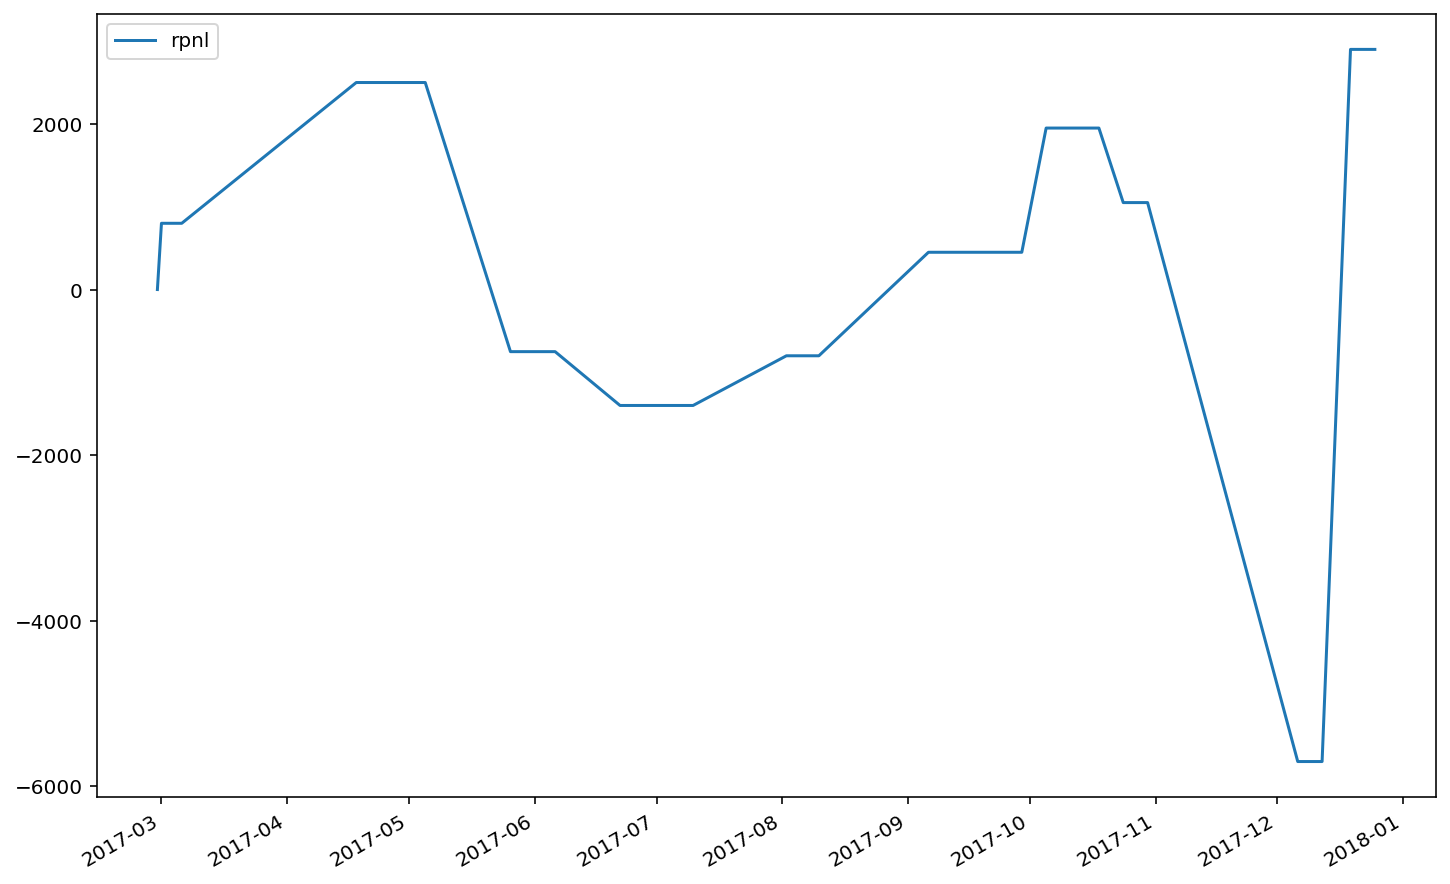

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

engine.df_rpnl.plot(figsize=(12, 8));

In [0]:

def fetch_historical_prices(symbol, start, end):
    import quandl

    # Update your Quandl API key here...
    QUANDL_API_KEY = 'vfB6Ln8TQsxweRFnn89J'
    quandl.ApiConfig.api_key = QUANDL_API_KEY
    df = quandl.get(symbol, start_date=start, end_date=end)
    return df
fetch_historical_prices('WIKI/AAPL', start='2015-01-01',
    end='2017-12-31')    